# Eindopdracht Bit Academy - Het slavernijverleden in beeld: van data naar inzichten.

Vorig jaar bood de burgemeester van Amsterdam, Femke Halsema, namens het stadsbestuur haar excuses aan voor de betrokkenheid van het toenmalige stadsbestuur bij de wereldwijde slavenhandel en slavernij. Dit was landelijk groot nieuws en berichten hierover werden gedeeld via de bekende nieuwsplatforms, maar ook de via kanalen van de gemeente. Dit bracht reacties teweeg bij volgers van de kanalen, Halsema-critici en degenen die niet geloven in de impact van het slavernijverleden. Als social media redacteur bij de gemeente Amsterdam zag ik het allemaal voorbij komen.

Enerzijds werd het nieuws positief ontvangen: 'Wat goed!' of 'Het werd eens tijd!'. Anderzijds waren er ook negatieve reacties: 'Het is toch gebeurd, praat er niet meer over', 'Ik had geen slaven, jij plukte geen katoen dus zeur niet!'
Ik ben in mijn werk wel wat gewend maar bleef me toch verbazen over deze reacties en meningen. Vooral de negatieve reacties zijn me erg bijgebleven.

Toen ik voor mijn eindopdracht van de opleiding ‘Junior Data Engineer’ een dataset mocht kiezen, kwam het onderwerp slavernijverleden weer op mijn pad. Vanwege mijn affiniteit met geschiedenis en Suriname ben ik gaan ‘googlen’ op deze termen in combinatie met de zoekterm dataset. Al gauw kwam ik een dataset 'Suriname Slavenregisters’ tegen op de website van het Nationaal Archief. 

De vragen die ik met behulp van deze dataset zou willen beantwoorden zijn:

1. Wat was de gemiddelde leeftijd van slaven? En is hierin een verschil per type plantage?
2. Vanaf en tot welke leeftijd werden slaven verhandeld?
3. Wat was de man/vrouw verhouding op de plantage? En is deze verschillend per type plantage?
4. Hoe lang bleven tot slaafgemaakten gemiddeld op de plantage?
5. Welke plantage-eigenaren verkochten de meeste slaven? 
6. Vanaf welk type plantage werden de meeste slaven verkocht?
7. Wat was een veel voorkomende naam onder de tot slaafgemaakten?

In [1]:
#Hier importeer ik de modules in die ik zal gebruiken voor deze opdracht
import pandas as pd
import re
import numpy as np

Toch maar hier de imports vanwege de blast issues

## Inladen en bekijken van data

Voor ik met de dataset aan de slag ga, wil ik vluchtig zien met wat voor dataset ik te maken heb. En daarvoor zet ik de volgende stappen:
Hoe zien de eerste regels van de dataset eruit?

In [2]:
#inladen dataset. Vanwege de melding 'set low_memory=false', heb ik ervoor gekozen om low_memory=false toe te passen tijdens het laden van de dataset. De dataset moet worden onderzocht voor ik een datatype kan toewijzen aan de kolommen.
df = pd.read_csv('NT00461_SLAVENREGISTERS_NIEUWE_DATASET.csv', low_memory=False)
#met de head functie laat ik de bovenste vijf regels zien van de dataframe df:
df.head()

,prs_id,ove_rank,prs_naam,prs_extranaam,prs_geslacht,prs_geboortedatum,prs_leeftijd,prs_moedersnaam,ove_eigenaar,ove_datum_inschrijving,...,ove_datum_uitschrijving,ove_datumtekst_uitschrijving,vwz_inventarisnummer,vwz_folio,ove_jaar,ove_serie,ove_type_register,vwz_scannr,vwz_scan,ove_UUID
0,1,010801a1796,Hoop,NaN,Man,NaN,45 jaar,NaN,S F Flu qq voor den Boedel JP Berner,1830,...,7 november 1834,overleden.,1,801,1830.0,1830-1838,Particulieren,Slavenregister_InvNr_01_FolioNr_0801a,https://www.nationaalarchief.nl/onderzoeken/ar...,5051c050-e6b2-11e9-9f05-00505693001d
1,2,010801a1797,Betje,NaN,Vrouw,NaN,36 jaar,NaN,S F Flu qq voor den Boedel JP Berner,1830,...,1838,NaN,1,801,1830.0,1830-1838,Particulieren,Slavenregister_InvNr_01_FolioNr_0801a,https://www.nationaalarchief.nl/onderzoeken/ar...,5051c122-e6b2-11e9-9f05-00505693001d
2,3,010801a1798,Charles,NaN,Jongens,NaN,14 jaar,NaN,S F Flu qq voor den Boedel JP Berner,1830,...,30 oktober 1836,overleden,1,801,1830.0,1830-1838,Particulieren,Slavenregister_InvNr_01_FolioNr_0801a,https://www.nationaalarchief.nl/onderzoeken/ar...,5051c190-e6b2-11e9-9f05-00505693001d
3,4,010801a1799,Winst,NaN,Jongens,NaN,16 jaar,NaN,S F Flu qq voor den Boedel JP Berner,1830,...,1838,NaN,1,801,1830.0,1830-1838,Particulieren,Slavenregister_InvNr_01_FolioNr_0801a,https://www.nationaalarchief.nl/onderzoeken/ar...,5051c1f4-e6b2-11e9-9f05-00505693001d
4,5,010801a1800,Premiere,NaN,Meisjes,NaN,5 jaar,NaN,S F Flu qq voor den Boedel JP Berner,1830,...,1838,NaN,1,801,1830.0,1830-1838,Particulieren,Slavenregister_InvNr_01_FolioNr_0801a,https://www.nationaalarchief.nl/onderzoeken/ar...,5051c262-e6b2-11e9-9f05-00505693001d


Hoeveel datapunten of regels heeft deze dataset?

In [3]:
#met df.shape zie ik het aantal regels en kolommen
print('Deze dataset heeft in totaal:', df.shape[0], 'regels')

Deze dataset heeft in totaal: 161790 regels


Uit welke datatypen bestaat de dataset?

In [4]:
df.dtypes

prs_id                            int64
ove_rank                         object
prs_naam                         object
prs_extranaam                    object
prs_geslacht                     object
prs_geboortedatum                object
prs_leeftijd                     object
prs_moedersnaam                  object
ove_eigenaar                     object
ove_datum_inschrijving           object
ove_datumtekst_inschrijving      object
ove_datum_uitschrijving          object
ove_datumtekst_uitschrijving     object
vwz_inventarisnummer             object
vwz_folio                        object
ove_jaar                        float64
ove_serie                        object
ove_type_register                object
vwz_scannr                       object
vwz_scan                         object
ove_UUID                         object
dtype: object

De eerste kolom is gevuld met integers of getallen. Het datatype van de overige kolommen is 'object' oftewel strings. (Strings kunnen zowel cijfers als letters zijn en het is niet mogelijk om strings op dezelfde manier te manipuleren als integers of getallen.)

In deze dataset zie je op de eerste vijf regels in meerdere kolommen 'NaN' staan. NaN betekent *Not a Number*. Hoeveel cellen bevatten geen data?  

In [5]:
#van de dataset df wil ik weten welke cellen geen data bevatten. Hiervan wil ik de som per kolom:
print('In', df.isnull().any().sum(), 'kolommen zijn lege waarden gevonden\n') 
print('Hieronder zie je in welke kolommen de lege waarden zijn gevonden:')
print(df.isnull().sum())

In 7 kolommen zijn lege waarden gevonden

Hieronder zie je in welke kolommen de lege waarden zijn gevonden:
prs_id                               0
ove_rank                             0
prs_naam                             0
prs_extranaam                   160886
prs_geslacht                         0
prs_geboortedatum                62067
prs_leeftijd                    154111
prs_moedersnaam                  61361
ove_eigenaar                         0
ove_datum_inschrijving               0
ove_datumtekst_inschrijving     112542
ove_datum_uitschrijving              0
ove_datumtekst_uitschrijving     92207
vwz_inventarisnummer                 0
vwz_folio                            0
ove_jaar                        114334
ove_serie                            0
ove_type_register                    0
vwz_scannr                           0
vwz_scan                             0
ove_UUID                             0
dtype: int64


Is de dataset bruikbaar in deze staat?

In [6]:
(df.isna().sum()/len(df.index))*100

prs_id                           0.000000
ove_rank                         0.000000
prs_naam                         0.000000
prs_extranaam                   99.441251
prs_geslacht                     0.000000
prs_geboortedatum               38.362692
prs_leeftijd                    95.253724
prs_moedersnaam                 37.926324
ove_eigenaar                     0.000000
ove_datum_inschrijving           0.000000
ove_datumtekst_inschrijving     69.560541
ove_datum_uitschrijving          0.000000
ove_datumtekst_uitschrijving    56.991779
vwz_inventarisnummer             0.000000
vwz_folio                        0.000000
ove_jaar                        70.668150
ove_serie                        0.000000
ove_type_register                0.000000
vwz_scannr                       0.000000
vwz_scan                         0.000000
ove_UUID                         0.000000
dtype: float64

Neen, de dataset is in deze staat niet bruikbaar. Een groot deel van de data ontbreekt. Ik zal ermee aan de slag gaan om het een en ander te organiseren. 

## 1. Organiseren van de dataset

Deze dataset heeft zoals je hebt gezien gebrekkige data. Waar mogelijk zal ik ontbrekende gegevens aanvullen, en incomplete data verwijderen.

### 1.1 De kolommen

Je kan als lezer wel iets opmaken uit de titels van de Series/kolommen, maar in het kader van de leesbaarheid van dit document kan ik de titels aanpassen. Voor deze eindopdracht zal ik dit alleen doen voor de kolommen waarvan ik denk dat ik ze nodig heb. De nieuwe titels baseer ik op de verklaringen die ik heb gevonden op https://www.nationaalarchief.nl/onderzoeken/zoekhulpen/suriname-slavenregisters#collapse-8669.

In [7]:
#Eerst maak ik een lijst van de columnnames:
print('Hier volgen de originele columnnames:', list(df))

#Met de volgende code hernoem ik de columnnames en wijs ik ze toe aan de dataframe
df.rename(columns = {'prs_naam':'Naam', 'prs_geslacht':'Geslacht', 'prs_geboortedatum': 'Geboortedatum', 'ove_eigenaar': 'Eigenaar', 'ove_datum_inschrijving': 'Inschrijfdatum', 'ove_datum_uitschrijving': 'Uitschrijfdatum', 'ove_datumtekst_uitschrijving': 'OpmerkingenBijUitschrijving', 'prs_leeftijd': 'Leeftijd', 'ove_type_register': 'TypeRegister' }, inplace = True)

Hier volgen de originele columnnames: ['prs_id', 'ove_rank', 'prs_naam', 'prs_extranaam', 'prs_geslacht', 'prs_geboortedatum', 'prs_leeftijd', 'prs_moedersnaam', 'ove_eigenaar', 'ove_datum_inschrijving', 'ove_datumtekst_inschrijving', 'ove_datum_uitschrijving', 'ove_datumtekst_uitschrijving', 'vwz_inventarisnummer', 'vwz_folio', 'ove_jaar', 'ove_serie', 'ove_type_register', 'vwz_scannr', 'vwz_scan', 'ove_UUID']


Hieronder zie je hoe de nieuwe kolommen eruit zien in het dataframe:

In [8]:
df.head(1)

,prs_id,ove_rank,Naam,prs_extranaam,Geslacht,Geboortedatum,Leeftijd,prs_moedersnaam,Eigenaar,Inschrijfdatum,...,Uitschrijfdatum,OpmerkingenBijUitschrijving,vwz_inventarisnummer,vwz_folio,ove_jaar,ove_serie,TypeRegister,vwz_scannr,vwz_scan,ove_UUID
0,1,010801a1796,Hoop,NaN,Man,NaN,45 jaar,NaN,S F Flu qq voor den Boedel JP Berner,1830,...,7 november 1834,overleden.,1,801,1830.0,1830-1838,Particulieren,Slavenregister_InvNr_01_FolioNr_0801a,https://www.nationaalarchief.nl/onderzoeken/ar...,5051c050-e6b2-11e9-9f05-00505693001d


Zoals eerder aangegeven zal ik niet alle kolommen gebruiken en kan ik er nu al wat laten vallen.

In [9]:
# dat doe ik met de volgende code
df.drop(['ove_rank', 'prs_extranaam', 'prs_moedersnaam', 'vwz_inventarisnummer', 'vwz_folio', 'ove_jaar', 'ove_serie', 'vwz_scannr', 'ove_UUID'], axis=1, inplace=True) 

Hoe ziet de dataset er nu uit?

In [10]:
df.head(1)

,prs_id,Naam,Geslacht,Geboortedatum,Leeftijd,Eigenaar,Inschrijfdatum,ove_datumtekst_inschrijving,Uitschrijfdatum,OpmerkingenBijUitschrijving,TypeRegister,vwz_scan
0,1,Hoop,Man,NaN,45 jaar,S F Flu qq voor den Boedel JP Berner,1830,NaN,7 november 1834,overleden.,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...


### 1.2 Het geslacht

Welke verschillende waarden staan er in de kolom 'Geslacht'?

In [11]:
df['Geslacht'].value_counts()

Vrouw         76361
Man           71957
Leeg           5470
Jongens        4185
Meisjes        3611
Onleesbaar      205
leeg              1
Name: Geslacht, dtype: int64

Dit ga ik organiseren door de term 'meisjes' te wijzigen in 'vrouw' en 'jongens' in 'man'. En de regels waarin het geslacht 'onleesbaar' of 'leeg' is, laat ik vallen.

In [12]:
#meisjes -> vrouw, jongens -> man
df['Geslacht'] = df['Geslacht'].replace(to_replace='Meisjes', value='Vrouw')
df['Geslacht'] = df['Geslacht'].replace(to_replace='Jongens', value='Man')
#uitfilteren en opslaan van dataset zonder items in lijst
lijst = ['leeg', 'Onleesbaar', 'Leeg']
df = df[df.Geslacht.isin(lijst) == False]
#resultaat
df['Geslacht'].value_counts()

Vrouw    79972
Man      76142
Name: Geslacht, dtype: int64

### 1.3 De leeftijden

De kolom 'Geboortedatum' bestaat nu uit strings. Dit moeten integers worden zodat ik ze kan manipuleren als getal ipv tekst. Hoe ziet de data er nu uit?

In [13]:
df['Geboortedatum'].tail(25)

161764       28 april 1863
161765                1814
161766                1813
161767                1843
161768                1829
161769                1846
161770                1847
161771                1825
161772                1847
161773                1848
161774                1813
161775        7 maart 1863
161776    18 november 1859
161777     4 februari 1862
161778                 NaN
161779                 NaN
161780                 NaN
161782                 NaN
161783                 NaN
161784                 NaN
161785                 NaN
161786                1826
161787                1794
161788                1826
161789                1837
Name: Geboortedatum, dtype: object

De geboortedatum ontbreekt, of is niet compleet. Voor ik verder kan werken zal ik met regular expression de geboortejaren uit de lijst geboortedatum filteren en in een nieuwe kolom plaatsen 'Geboortejaar'.

In [14]:
#de nieuwe kolom is een extract van de kolom geboortedatum waarbij ik vier cijfers uitfilter
df['Geboortejaar'] = df['Geboortedatum'].str.extract('(\d\d\d\d)', expand = True)
#de kolom geboortedatum heb ik niet meer nodig en drop ik bij dezen
df.drop('Geboortedatum', axis=1, inplace=True)
df['Geboortejaar']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
161785     NaN
161786    1826
161787    1794
161788    1826
161789    1837
Name: Geboortejaar, Length: 156114, dtype: object

De stappen die ik heb doorlopen om tot de kolom 'Geboortejaar' te komen, zal ik herhalen om tot een eenduidige kolom voor 'Inschrijfdatum' en 'Uitschrijfdatum' te komen. Deze kolomen bestaan nu ook uit verschillende type strings waarin de waarden nogal varieren bijvoorbeeld: dag/maand/jaar of jaar.

In [15]:
df['Inschrijfjaar'] = df['Inschrijfdatum'].str.extract('(\d\d\d\d)', expand = True)
df['Uitschrijfjaar'] = df['Uitschrijfdatum'].str.extract('(\d\d\d\d)', expand = True)

#de nieuwe kolom is een extract van de kolom inschrijfdatum waarbij ik vier cijfers uitfilter. Hetzelfde geldt voor de nieuwe kolom uitschrijfjaar.

Wat ik voor de kolom 'Geboortedatum' heb gedaan, zal ik nu ook doen voor de kolommen 'Inschrijfdatum' en 'Uitschrijfdatum':

In [16]:
#de kolommen inschrijfdatum en uitschrijfdatum heb ik niet meer nodig en drop ik bij dezen
df.drop(['Inschrijfdatum', 'Uitschrijfdatum'], axis=1, inplace=True)

Hoe ziet de data er nu uit?

In [17]:
df.isna().sum()

prs_id                              0
Naam                                0
Geslacht                            0
Leeftijd                       148450
Eigenaar                            0
ove_datumtekst_inschrijving    111187
OpmerkingenBijUitschrijving     88792
TypeRegister                        0
vwz_scan                            0
Geboortejaar                    56761
Inschrijfjaar                     143
Uitschrijfjaar                    917
dtype: int64

Zo te zien heb ik wat data verloren in de kolommen 'Inschrijfjaar' en 'Uitschrijfjaar'. Helaas, maar voor nu zal ik het ermee doen. Met de data die ik nu heb in de kolommen geboortedatum en inschrijfjaar, kan ik van een groot deel van deze dataset de leeftijd uitrekenen, bij benadering. Omdat niet in alle gevallen de exacte geboorte- en inschrijfdatum beschikbaar is, kan ik een leeftijd bij benadering uitrekenen. De data die ik hiervoor gebruik staat in de kolom 'Inschrijfjaar' en 'Geboortejaar'. Ik kies liever voor deze aanpak, dan dat ik de rijen waarin de leeftijd ontbreek bij voorbaat laat vallen.

Hoe reken ik de leeftijd uit in deze dataset?

In [18]:
#Om de leeftijd uit te kunnen rekenen, wil ik het datatype van de relevante kolommen omzetten naar integers:
#lege waarden in geboortejaar vullen met 0
df['Geboortejaar'] = df['Geboortejaar'].fillna(value=0)
# alle nan values in onderstaande kolommen vullen met 0 om te voorkomen dat de eerstvolgende opdracht tegen fouten aanloopt:
df.dropna(subset=['Inschrijfjaar','Uitschrijfjaar'])
df[['Inschrijfjaar','Uitschrijfjaar', 'Geboortejaar']] = df[['Inschrijfjaar','Uitschrijfjaar', 'Geboortejaar']].apply(pd.to_numeric, errors='coerce')

c = df.loc[:, 'Inschrijfjaar':'Uitschrijfjaar'].columns
df = df.dropna(subset=c, how='all')

#df.loc[:,['Geboortejaar', 'Inschrijfjaar', 'Uitschrijfjaar']] = df.loc[:,['Geboortejaar', 'Inschrijfjaar', 'Uitschrijfjaar']].astype(int)
#df['x'] = df['x'].astype(int)



Hoe worden de leeftijden weergegeven in de dataset? Dat laat ik hieronder zien.

In [19]:
#subset om de leeftijden in kaart te brengen
leeftijd = df['Leeftijd']
#hiermee haal ik de unieke waarden op
leeftijd.unique()

array(['45 jaar', '36 jaar', '14 jaar', '16 jaar', '5 jaar', '4 jaar',
       '3 maanden', nan, '28 jaar', '42 jaar', '35 jaar', '10 jaar',
       '8 jaar', '3 jaar', '22 jaar', '18 jaar', '1 jaar', '46 jaar',
       '27 jaar', '41 jaar', '49 jaar', '23 jaar', '62 jaar', '38 jaar',
       '6 jaar', '92 jaar', '25 jaar', '80 jaar', '50 jaar', '9 jaar',
       '56 jaar', '11 jaar', '2 jaar', '33 jaar', '66 jaar', '40 jaar',
       '12 jaar', '44 jaar', '37 jaar', '17 jaar', '20 jaar', '52 jaar',
       '43 jaar', '3 1/2 jaar', '72 jaar', '13 jaar', '26 jaar',
       '1/2 jaar', '19 jaar', '60 jaar', '31 jaar', '24 jaar', '21 jaar',
       '51 jaar', '32 jaar', '30 jaar', '15 jaar', '65 jaar', '54 jaar',
       '47 jaar', '48 jaar', '53 jaar', '29 jaar', '7 jaar', '34 jaar',
       '57 jaar', '39 jaar', '71 jaar', '5 maanden', '10 maanden',
       '4 1/2 jaar', '1 1/2 jaar', '12-14 jaar', '6 maanden', '68 jaar',
       '55 jaar', '9 maanden', '2 maanden', '8 1/2 jaar', '7 1/2 jaar',
     

In de set staan strings en staan verschillende vormen van leeftijden: leeftijd in jaren, leeftijd in maanden, halve jaren. Dit wordt lastig om in één keer om te zetten in integers/ getallen. Ik heb besloten om alleen te werken met de data waarin 'jaar' i.c.m. 2 cijfers staat.

In [20]:
#drop rijen waar leeftijd == NaN
df.dropna(subset=['Leeftijd'])
#datatype van de kolom wordt omgezet naar str
df['Leeftijd'].astype(str)
#subset = als kolom leeftijd bevat 'jaar' en twee cijfers
dflfjr = (df[df['Leeftijd'].str.contains('jaar', na=False)])
#subset wordt opgenomen in dataset
df['Leeftijd'] = dflfjr.loc[:,'Leeftijd'].astype(str).str.extract('(\d\d)', expand = True)
df.dropna(subset=['Leeftijd'])
#en de strings worden integers
df['Leeftijd'] = df['Leeftijd'].apply(pd.to_numeric, errors='coerce')
df.head(50)

,prs_id,Naam,Geslacht,Leeftijd,Eigenaar,ove_datumtekst_inschrijving,OpmerkingenBijUitschrijving,TypeRegister,vwz_scan,Geboortejaar,Inschrijfjaar,Uitschrijfjaar
0,1,Hoop,Man,45.0,S F Flu qq voor den Boedel JP Berner,NaN,overleden.,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,0,1830.0,1834.0
1,2,Betje,Vrouw,36.0,S F Flu qq voor den Boedel JP Berner,NaN,NaN,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,0,1830.0,1838.0
2,3,Charles,Man,14.0,S F Flu qq voor den Boedel JP Berner,NaN,overleden,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,0,1830.0,1836.0
3,4,Winst,Man,16.0,S F Flu qq voor den Boedel JP Berner,NaN,NaN,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,0,1830.0,1838.0
4,5,Premiere,Vrouw,NaN,S F Flu qq voor den Boedel JP Berner,NaN,NaN,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,0,1830.0,1838.0
5,6,Charlotte,Vrouw,14.0,Godefroij Nanoe van,NaN,NaN,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,0,1830.0,1838.0
6,7,Dido,Vrouw,NaN,Godefroij Nanoe van,NaN,NaN,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,0,1830.0,1838.0
7,8,Hendrik,Man,NaN,Godefroij Nanoe van,NaN,NaN,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,0,1830.0,1838.0
8,9,Seraphina,Vrouw,NaN,Godefroij Nanoe van,Gekocht op publieke vendue van Plantage Corisana,Verkocht aan Ge. van La Parra voor de schat va...,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,0,1832.0,1836.0
9,10,Francois,Man,NaN,Godefroij Nanoe van,geboren uit Dido,NaN,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,0,1835.0,1838.0


Als de leeftijd in de dataset df nog niet bekend is, dan moet er een vergelijking gemaakt worden tussen de kolommen 'inschrijfjaar' en 'geboortejaar':
Leeftijd = Inschrijfjaar - geboortejaar

In [21]:
# waar getal in kolom 'Leeftijd' is groter dan 0, vul 'Leeftijd' in, anders reken uit waarde 'Inschrijfjaar' - 'Geboortejaar'
df['Leeftijd'] = np.where(df['Leeftijd'] > 0, df['Leeftijd'], df['Inschrijfjaar'] - df['Geboortejaar'])

Hoe ziet de dataset er nu uit?

In [22]:
df['Leeftijd'].value_counts()

 1838.0    23440
 0.0       15534
 1830.0     6423
 1.0        5402
 3.0        2061
           ...  
-28.0          1
-20.0          1
 137.0         1
 95.0          1
 109.0         1
Name: Leeftijd, Length: 165, dtype: int64

Hoe zien de laatste regels eruit?

In [23]:
df.tail(50)

,prs_id,Naam,Geslacht,Leeftijd,Eigenaar,ove_datumtekst_inschrijving,OpmerkingenBijUitschrijving,TypeRegister,vwz_scan,Geboortejaar,Inschrijfjaar,Uitschrijfjaar
161739,161744,Bebe,Vrouw,0.0,Materiel S.,Aankoop van K.W. Reijke (Zie fo. 2755.).,NaN,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,1859,1859.0,1863.0
161740,161745,Elisa,Vrouw,0.0,Materiel S.,NaN,NaN,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,1861,1861.0,1863.0
161741,161746,Mietje,Vrouw,34.0,Pietzcker W.J.C.M.,Aankoop van L.E.S. Pietzcker / (zie fo 2525.).,NaN,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,1825,1859.0,1863.0
161742,161747,Paulina,Vrouw,50.0,Pietzcker W.J.C.M.,Aankoop van de wed. A.H. Hiemcke voor de mind....,NaN,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,1810,1860.0,1863.0
161743,161748,Leentje,Vrouw,14.0,Pietzcker W.J.C.M.,Aankoop van L.P. va Exel (Zie fo. 2748.,verkoop op den 24 februarij 1862 aan L.P. van ...,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,1847,1861.0,1862.0
161744,161749,Albertina,Vrouw,13.0,Stoom Albert van der,aankoop van L. Bexbij priveen nom.ux. en (nbl)...,Gemanumitteerd onder den namen van Celestina A...,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,1846,1859.0,1859.0
161745,161750,Jennij Lind,Vrouw,8.0,Stoom Albert van der,aankoop van L. Bixbij priv,Gemanumitteerd onder den namen van Elisabeth J...,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,1851,1859.0,1859.0
161746,161751,Leentje,Vrouw,0.0,Mac Intosh Alexander,NaN,overleden 18 Septbr 1862.,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,1859,1859.0,1862.0
161747,161752,Theodorus,Man,0.0,Mac Intosh Alexander,Abusivelijk opgegeven als overleden moestende ...,overleden Junij 1860.,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,1860,1860.0,1860.0
161748,161753,Benbow,Man,0.0,Mac Intosh Alexander,NaN,NaN,Particulieren,https://www.nationaalarchief.nl/onderzoeken/ar...,1860,1860.0,1863.0


Hierboven zie je leeftijden van boven de honderd, en onder de 0 staan. En daar ga ik met onderstaande code wat aan doen.

In [24]:
#In de dataset mogen alleen nog de leeftijden onder de 110 en vanaf 0 voorkomen.
df = df[(df['Leeftijd']<115) & (df['Leeftijd']>=0)]
#daar blijft van de dataset nog het volgende aantal regels over:
df.shape[0]

105226

Nu heb ik nog niet gekeken naar de regels waarin zowel de leeftijd als het geboortejaar of inschrijfjaar op 0 staat:

In [25]:
babies = df[df['Leeftijd'] == 0]

print('Volgens de dataset zijn er:', babies.shape[0], '0-jarigen of baby\'s')

#hiermee filter ik de rijen uit waarin zowel de leeftijd op 0 staat, maar ook het geboortejaar of inschrijfjaar
valse_babies = df.loc[(df['Leeftijd'] == 0) & (df['Geboortejaar'] == 0) | (df['Inschrijfjaar'] == 0)]
print('Dit is het aantal \'onechte\' baby\'s:', valse_babies.shape[0])
#de onechte baby's laat ik vallen in de dataset.
df = df.drop(valse_babies.index)

print('En zo houden we:', df.shape[0], 'records over in de dataset')

Volgens de dataset zijn er: 15534 0-jarigen of baby's
Dit is het aantal 'onechte' baby's: 0
En zo houden we: 105226 records over in de dataset


### 1.4 Reden van uitschrijving

De records in deze dataset hebben ook een kolom 'Opmerkingen bij uitschrijving'. Zou het mogelijk zijn om te achterhalen om welke redenen deze uitschrijvingen plaatsvonden? Dat zoek ik hieronder graag uit.

In [26]:
#wat kom je zoal tegen in deze kolom? Wat staat er over de reden van uitschrijving?
df['OpmerkingenBijUitschrijving'].value_counts().tail(50)

Verkoop op vendu van J. C. Gomperts vendumr. aan G. H. L. Bakker (Zie fo 61/2761.).                                                                                                                                                                                                                                                                                                                                                                                                                        1
overgeschreven op naam van J. van Lier nom. ux. als erfgenaam (Zie fo 2803.). Bij Gouvernts Resolutie dd 28 Mei 1857 No 723, is autorisatie verleend om in dit Register als verbetering in plaats van Joseph Levij Menist weduwe Salomons - de weduwe Salomons Joseph Levij Menist, op te nemen.                                                                                                                                                                                                           1
verkoop aan T.

Hieronder ga ik verder:

In [27]:
#waar geen opmerking bijstaat, vul in 'none'
df['OpmerkingenBijUitschrijving'] = df['OpmerkingenBijUitschrijving'].fillna('None')
#als de cel in kolom opmerkingbijuitschrijving een stukje string bevat, plaats in nieuwe kolom 'Opmerkingen' onder label
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("overgebr", case=False), 'Opmerkingen'] = "overgebracht naar andere plantage"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("overl", case=False), 'Opmerkingen'] = "overleden"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("gelegateerd", case=False), 'Opmerkingen'] = "nagelaten"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("manu", case=False), 'Opmerkingen'] = "vrijgelaten"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("verko", case=False), 'Opmerkingen'] = "verkocht"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("overgeschreven", case=False), 'Opmerkingen'] = "overgeschreven"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("besmet", case=False), 'Opmerkingen'] = "besmet"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("overgedragen", case=False), 'Opmerkingen'] = "overgedragen"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("overgegaan", case=False), 'Opmerkingen'] = "overgegaan"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("overgegeven", case=False), 'Opmerkingen'] = "overgegeven"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("overschrijving", case=False), 'Opmerkingen'] = "overgeschreven"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("geschonk|geschenk", case=False), 'Opmerkingen'] = "geschonken"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("verdronken", case=False), 'Opmerkingen'] = "verdronken"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("verkoop", case=False), 'Opmerkingen'] = "verkocht"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("vrijdom", case=False), 'Opmerkingen'] = "vrijgelaten"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("gemanu", case=False), 'Opmerkingen'] = "vrijgelaten"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("vrijgeworden", case=False), 'Opmerkingen'] = "vrijgelaten"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("vrij geworden", case=False), 'Opmerkingen'] = "vrijgelaten"
df.loc[df['OpmerkingenBijUitschrijving'].str.contains("none", case=False), 'Opmerkingen'] = "onbekend"

print(df['Opmerkingen'].value_counts())
print(df.isna().sum())

onbekend                             63846
overleden                            19631
verkocht                              6936
overgeschreven                        6779
vrijgelaten                           5050
overgebracht naar andere plantage      287
besmet                                 258
verdronken                             138
overgegeven                            124
geschonken                             119
overgedragen                           115
overgegaan                             101
nagelaten                               68
Name: Opmerkingen, dtype: int64
prs_id                             0
Naam                               0
Geslacht                           0
Leeftijd                           0
Eigenaar                           0
ove_datumtekst_inschrijving    85609
OpmerkingenBijUitschrijving        0
TypeRegister                       0
vwz_scan                           0
Geboortejaar                       0
Inschrijfjaar                      1
Ui

De kolom 'Opmerkingen' heeft weer NaN values en met onderstaande code vul ik ze in met de string 'onbekend'

In [28]:
df['Opmerkingen'] =  df['Opmerkingen'].fillna('onbekend')

### 1.5 Inschrijfduur

Kan ik de inschrijfduur per record in de dataset uitrekenen? Daarvoor zou ik de volgende kolommen met elkaar moeten vergelijken: De duur van de inschrijving is het uitschrijfjaar min het inschrijfjaar.

In [29]:
df['DuurInschrijving'] = np.where(df['Inschrijfjaar'] == 0, df['Inschrijfjaar'], df['Uitschrijfjaar'] - df['Inschrijfjaar'])
df['DuurInschrijving'] = np.where(df['Uitschrijfjaar'] == 0, df['Uitschrijfjaar'], df['DuurInschrijving'])

#df['DuurInschrijving'] = df['Uitschrijfjaar'] - df['Inschrijfjaar']
#df.head(5)

Nu ik de kolom 'Duurinschrijving' heb gemaakt, wil ik weten welke waarden er te vinden zijn.

In [30]:
#tel de unieke waarden in de kolom
df['DuurInschrijving'].value_counts()

 3.0     31947
 12.0    19022
 1.0      9228
 2.0      8455
 0.0      7516
 8.0      6457
 4.0      4305
 9.0      3495
 5.0      3177
 10.0     3122
 6.0      3021
 7.0      2433
 11.0     2244
-1.0       114
 13.0       94
 14.0       73
 15.0       62
-2.0        20
-3.0        15
-7.0         9
-17.0        7
-6.0         5
-5.0         3
-4.0         3
-8.0         2
-9.0         2
-30.0        1
 37.0        1
 30.0        1
 32.0        1
 18.0        1
Name: DuurInschrijving, dtype: int64

Ok, dus er zitten negatieve waarden in deze kolom. Die haal ik eruit.

In [31]:
#dit zijn regels met fouten want een inschrijfduur kan nooit negatief zijn. Ik ben op zoek gegaan naar een lijstje met de negatieve inschrijfperiodes en filter ze uit:
neg_inschr = df.loc[df['DuurInschrijving'] >= 0]
df = neg_inschr
print('Met als resultaat:', df['DuurInschrijving'].value_counts())

Met als resultaat: 3.0     31947
12.0    19022
1.0      9228
2.0      8455
0.0      7516
8.0      6457
4.0      4305
9.0      3495
5.0      3177
10.0     3122
6.0      3021
7.0      2433
11.0     2244
13.0       94
14.0       73
15.0       62
37.0        1
30.0        1
32.0        1
18.0        1
Name: DuurInschrijving, dtype: int64


### 1.6 Type plantages

Suriname had plantages met ieder een eigen specialiteit, [waaronder tabak, suiker, koffie en meer](https://nl.wikipedia.org/wiki/Lijst_van_plantages_in_Suriname). Misschien kan ik dat ook terugvinden in de dataset. Daarvoor zal ik kijken naar de inhoud van de kolom 'Eigenaar'.

In [32]:
#subset met records waar in de kolom eigenaar bepaalde woorden in voorkomen
plant = df.loc[df["Eigenaar"].str.contains("koffie|suiker|tabak|katoen|houtplantage|houtgrond")]
#tel de unieke waarden in de kolom
print('In totaal zijn er', plant['Eigenaar'].value_counts().sum(),'unieke records in de dataset waarvan het type plantage bekend is.')

In totaal zijn er 4617 unieke records in de dataset waarvan het type plantage bekend is.


Dat is een behoorlijke lijst. Ik zal het type per plantage labelen zodat het overzichtelijker wordt in de dataset.

In [33]:
df.loc[df['Eigenaar'].str.contains("koff", case=False), 'TypePlantage'] = "koffieplantage"
df.loc[df['Eigenaar'].str.contains("suiker", case=False), 'TypePlantage'] = "suikerplantage"
df.loc[df['Eigenaar'].str.contains("tabak", case=False), 'TypePlantage'] = "tabakplantage"
df.loc[df['Eigenaar'].str.contains("katoen", case=False), 'TypePlantage'] = "katoenplantage"
df.loc[df['Eigenaar'].str.contains("houtpla", case=False), 'TypePlantage'] = "houtplantage"
df.loc[df['Eigenaar'].str.contains("houtgrond", case=False), 'TypePlantage'] = "houtplantage"

# de lege cellen in TypePlantage worden vervangen door Onbekend
df['TypePlantage'] =  df['TypePlantage'].fillna('onbekend')

df['TypePlantage'].value_counts()

onbekend          99934
houtplantage       2402
katoenplantage     1109
suikerplantage      682
koffieplantage      528
Name: TypePlantage, dtype: int64

### 1.7 Hoe ziet de dataset eruit na het opschonen?

Dat laat ik hieronder zien.

In [34]:
df.isna().sum()

prs_id                             0
Naam                               0
Geslacht                           0
Leeftijd                           0
Eigenaar                           0
ove_datumtekst_inschrijving    85188
OpmerkingenBijUitschrijving        0
TypeRegister                       0
vwz_scan                           0
Geboortejaar                       0
Inschrijfjaar                      0
Uitschrijfjaar                     0
Opmerkingen                        0
DuurInschrijving                   0
TypePlantage                       0
dtype: int64

Hoe ziet de index eruit na het verwijderen van de regels?

In [35]:
df.index 

Int64Index([     0,      1,      2,      3,      5,     14,     15,     16,
                17,     21,
            ...
            161773, 161774, 161775, 161776, 161777, 161785, 161786, 161787,
            161788, 161789],
           dtype='int64', length=104655)

Hmm, dat lijkt me niet wenselijk. Ik zal de index resetten.

In [36]:
df.reset_index(drop=True, inplace=True)
df.index

RangeIndex(start=0, stop=104655, step=1)

Is de dataset bruikbaar op deze manier?

In [37]:
(df.isna().sum()/len(df.index))*100

#met shape laat ik zien hoeveel rijen en kolommen deze dataset heeft:
print('Deze dataset heeft:', df.shape[0], 'regels en', df.shape[1], 'kolommen')

print('Zo ziet de dataset er uit:', df.head(1))

Deze dataset heeft: 104655 regels en 15 kolommen
Zo ziet de dataset er uit:    prs_id  Naam Geslacht  Leeftijd                              Eigenaar  \
0       1  Hoop      Man      45.0  S F Flu qq voor den Boedel JP Berner   

  ove_datumtekst_inschrijving OpmerkingenBijUitschrijving   TypeRegister  \
0                         NaN                  overleden.  Particulieren   

                                            vwz_scan  Geboortejaar  \
0  https://www.nationaalarchief.nl/onderzoeken/ar...             0   

   Inschrijfjaar  Uitschrijfjaar Opmerkingen  DuurInschrijving TypePlantage  
0         1830.0          1834.0   overleden               4.0     onbekend  


## 2. Deelvragen

In dit hoofdstuk beantwoord ik de deelvragen. Maar eerst:

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

Nadat ik de juiste libraries heb geimporteerd kan ik aan de slag.

### 2.1 Wat was de gemiddelde leeftijd van de tot slaafgemaakten? Hoe zag dit eruit per type plantage?


Dat laat ik zien in de volgende stappen.

In [39]:
# het gemiddelde of de mean van een kolom filter ik uit met:
print('De gemiddelde leeftijd is:', df['Leeftijd'].mean())

lpp = df.groupby(["TypePlantage"]).Leeftijd.mean().reset_index(name='Gem_leeftijd')
#in deze subset zal ik de groep waarvan het type plantage niet bekend is buiten beschouwing laten en daarom drop ik de volgende regels
lpp = lpp.drop(index=[3])
lpp

De gemiddelde leeftijd is: 23.168725813386843


,TypePlantage,Gem_leeftijd
0,houtplantage,21.676103
1,katoenplantage,30.028855
2,koffieplantage,28.990530
4,suikerplantage,30.631965


Hieronder zal ik een barplot tonen:

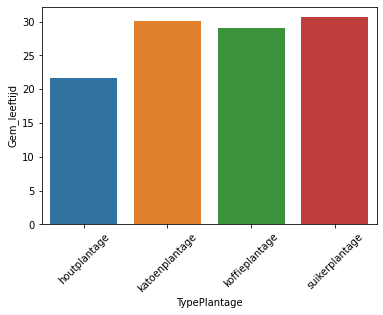

In [40]:
plt.xticks(rotation=45)
sns.barplot(x="TypePlantage", y="Gem_leeftijd", data=lpp)
plt.show()

De gemiddelde leeftijd in de hele dataset is 23 jaar. De gemiddelde leeftijd op de katoen-, koffie-, en suikerplantage ligt rond de 30 jaar. Opvallend is dat de gemiddelde leefijd op de houtplantage flink wat lager ligt, rond 21 jaar. In deze dataset is niet van alle records bekend op wat voor soort plantage zij werkten. 

### 2.2 Vanaf en tot welke leeftijd werden tot slaafgemaakten verhandeld? 

Dat laat ik zien in de volgende stappen.

In [41]:
lf = df.groupby('Opmerkingen')['Leeftijd'].value_counts().reset_index(name='Aantal')
lf = lf[lf['Opmerkingen'] == 'verkocht']
lf.sort_values(by='Leeftijd', inplace=True) 
lf.reset_index(drop=True, inplace=True)
lf.describe()


,Leeftijd,Aantal
count,85.000000,85.000000
mean,42.176471,79.847059
std,24.980553,80.569034
min,0.000000,1.000000
25%,21.000000,15.000000
50%,42.000000,84.000000
75%,63.000000,122.000000
max,90.000000,619.000000


Van de groep mensen die is verkocht was de laagst geregistreerde leeftijd 0, de hoogst geregistreerde was 90.

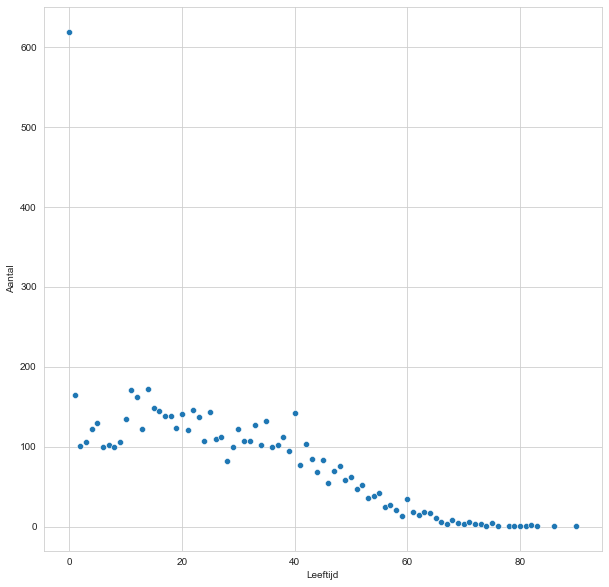

In [42]:
plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
sns.scatterplot(x='Leeftijd', y='Aantal', data=lf)
plt.show()

Uit de scatterplot hierboven kun je het volgende opmaken: hoe jonger je was, hoe groter de kans was dat je als tot slaafgemaakte werd verkocht aan een ander. Na het 40ste levensjaar kwam het steeds minder voor dat men werd verkocht. Baby's met een leeftijd van 0, waren erg gewild.

### 2.3 Hoe was de verhouding man/vrouw op de plantages? Zie je verschillen per type plantage?

Dat laat ik zien in de volgende stappen.

In [43]:

geslacht_aantal = df['Geslacht'].count()
verdeling = df['Geslacht'].value_counts()
print('De verdeling is als volgt:')
print(verdeling)
print('\nTotaal is:', geslacht_aantal)
print(verdeling[0])

print('In totaal zijn er', geslacht_aantal, 'records in deze dataset \n\n'
      
     'van dit aantal is', (verdeling[1]/geslacht_aantal)*100 ,'% man en', (verdeling[0]/geslacht_aantal)*100,'% vrouw.')

De verdeling is als volgt:
Vrouw    54294
Man      50361
Name: Geslacht, dtype: int64

Totaal is: 104655
54294
In totaal zijn er 104655 records in deze dataset 

van dit aantal is 48.12096889780708 % man en 51.87903110219292 % vrouw.


Hoe zit het met de verdeling per plantage?

In [44]:
#het aantal mannen/vrouwen per type plantage
ges_pp = df.groupby('TypePlantage')['Geslacht'].value_counts().reset_index(name='Aantal')

#in deze subset zal ik de groep waarvan het type plantage niet bekend is buiten beschouwing laten en daarom drop ik de volgende regels
ges_pp = ges_pp.drop(index=[6,7])

Hieronder vind je een barplot:

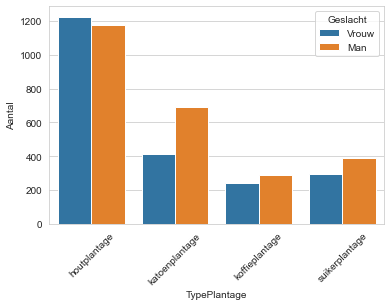

In [45]:
plt.xticks(rotation=45)
sns.barplot(x="TypePlantage", y="Aantal", data=ges_pp, hue='Geslacht')
plt.show()

We zagen met de eerdere berekening dat de verdeling man/vrouw in de gehele dataset in verhouding staat tot elkaar. Maar als je naar de verdeling kijkt per type plantage zie je een verschil. Het type plantage waar de verhouding iets afwijkt van de rest is de katoenplantage. Het aandeel mannen dat op een katoenplantage was geregistreerd, was aanzienlijk groter dan het aantal vrouwen.

### 2.4 Wat was de gemiddelde verblijfsduur op de plantages?

Dat laat ik zien in de volgende stappen.

In [46]:
df['DuurInschrijving'].describe()

count    104655.000000
mean          5.358664
std           4.110955
min           0.000000
25%           3.000000
50%           3.000000
75%           9.000000
max          37.000000
Name: DuurInschrijving, dtype: float64

De gemiddelde verblijfduur per record in deze dataset is 5.33. Men verbleef gemiddeld 5 jaar op de plantage. De kortste inschrijfduur is 0 en dat komt overeen met de informatie die we eerder zagen over het verkopen van tot slaafgemaakten. Daar zag je al dat baby's werden verkocht.

### 2.5 Welke plantage-eigenaren verkochten de meeste slaven?

Dat laat ik zien in de volgende stappen.

In [47]:
#opmerkingen per eigenaar
msales = df.groupby('Eigenaar').Opmerkingen.value_counts().reset_index(name='aantal')
msales.sort_values(by='aantal', ascending=False, inplace=True)
msales.reset_index(drop=True, inplace=True)
uitk0mst = msales[msales['Opmerkingen'] == 'verkocht']
uitk0mst.reset_index(drop=True, inplace=True)
uitk0mst.head()

,Eigenaar,Opmerkingen,aantal
0,Parrij Boedel Thomas B.,verkocht,152
1,plantage Leijdenshoop en Jacobslust divisie Ma...,verkocht,134
2,Mesquita Isak J. en Laurens A. de,verkocht,93
3,Vries Abraham B. de,verkocht,78
4,Thurkow M. A. 7/8 en P. de Montel 1/8,verkocht,73


Hierboven tref je de top 5 eigenaren met de meeste sales. Wel met een kanttekening: van 65389 records in de dataset is niet bekend om welke reden iemand is uitgeschreven uit het register. Dat zie je hieronder ook.

In [48]:
df['Opmerkingen'].value_counts()

onbekend                             65389
overleden                            19589
verkocht                              6787
overgeschreven                        6775
vrijgelaten                           4928
overgebracht naar andere plantage      284
besmet                                 250
verdronken                             138
overgegeven                            124
geschonken                             118
overgedragen                           111
overgegaan                              94
nagelaten                               68
Name: Opmerkingen, dtype: int64

### 2.6 Vanaf welk type plantage werden de meeste slaven verkocht?

Dat laat ik zien in de volgende stappen.

<Figure size 1800x1800 with 0 Axes>

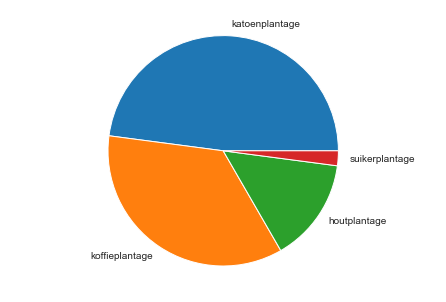

In [49]:
salespp = df.groupby('TypePlantage').Opmerkingen.value_counts().reset_index(name='aantal')
salespp.sort_values(by='aantal', ascending=False, inplace=True)
salespp.reset_index(drop=True, inplace=True)
salespp = salespp[salespp['Opmerkingen'] == 'verkocht']
salespp.reset_index(drop=True, inplace=True)
salespp.drop(index=df.index[0], axis=0, inplace=True) 

#labels en values instellen
type = salespp.TypePlantage
aantal = salespp.aantal

#piechart visualiseren
plt.figure(figsize=(25, 25))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(aantal, labels = type,autopct=None)
plt.show()


In de piechart hierboven zie je dat van het aantal geregistreerde sales per type plantage, de katoenplantage de meeste sales heeft in deze dataset. 

### 2.7 Wat was een veel voorkomende naam onder de tot slaafgemaakten?

De tot slaafgemaakten waren tot zover in mijn eindopdracht gereduceerd tot aantallen. Omdat het hier over mensen ging, vond ik het belangrijk om ook hun namen in beeld te brengen.

In [50]:
#Hier filter ik de namen die het vaakst voorkomen in de dataset, waarvan de top 10.
Top10naam = df['Naam'].value_counts().head(10)
print('De top 10 van namen die het meest voorkomen in de dataset\n')
print(Top10naam)

De top 10 van namen die het meest voorkomen in de dataset

Anna         702
Johanna      693
Johannes     693
Frans        688
Louisa       684
Willem       668
Frederik     662
Maria        652
Christina    650
Louis        640
Name: Naam, dtype: int64


Zo te zien komt de naam `Anna` het vaakst voor in de dataset. Hoe zag de top tien van namen voor slaafgemaakten eruit per geslacht? Dat zien we hieronder.

In [51]:
naam_mn = df[df["Geslacht"] == "Man"]
naam_vr = df[df["Geslacht"] == "Vrouw"]

print('Top 10 aantal geregistreerde namen van mannen:')
print(naam_mn['Naam'].value_counts().head(10))
print('')
print('Top 10 aantal geregistreerde namen van vrouwen:') 
print(naam_vr['Naam'].value_counts().head(10))

Top 10 aantal geregistreerde namen van mannen:
Johannes      692
Frans         687
Willem        666
Frederik      660
Louis         639
George        634
Charles       602
Christiaan    596
Eduard        582
Hendrik       581
Name: Naam, dtype: int64

Top 10 aantal geregistreerde namen van vrouwen:
Anna         700
Johanna      689
Louisa       683
Christina    649
Maria        647
Charlotte    541
Carolina     533
Cornelia     524
Henriette    517
Francina     517
Name: Naam, dtype: int64


Opmerkelijk is dat de namen nogal Europees klinken. Het lijkt me niet dat de tot slaaf gemaakten deze namen zelf hebben bedacht. Mogelijk hebben ze deze naam gekregen van een van de eigenaren. Helaas kan ik de oorsprong van de gegeven namen niet herleiden uit deze dataset. 

## 3 Conclusie

Na het volgen van het data-engineer traject bij Bit Academy kan ik zeggen dat het voor mij een drukke, intensieve maar vooral leerzame periode was. Toen ik eenmaal begon aan het traject wist ik niet waar ik aan begon: ik sprong in het diepe en heb kennis gemaakt met nieuwe software, methodes en het lijkt me leuk om me hier vaker mee bezig te houden. In de eindopdracht kon ik laten zien wat ik zoal heb geleerd in de afgelopen tien weken. Zoals ik in de inleiding al aangaf, kwam ik een interessante dataset tegen die ik mocht manipuleren, visualiseren en duiden. Een samenvattend antwoord op de deelvragen vind je hieronder.

    Wat was de gemiddelde leeftijd van de slaafgemaakten? En is hierin een verschil per type plantage?
De gemiddelde leeftijd in de hele dataset is 23 jaar. De gemiddelde leeftijd op de katoen-, koffie-, en suikerplantage ligt rond de 30 jaar. Opvallend is dat de gemiddelde leeftijd op de houtplantage flink wat lager ligt, rond 21 jaar. In deze dataset is niet van alle records bekend op wat voor soort plantage zij werkten. 

    Vanaf en tot welke leeftijd werden tot slaafgemaakten verhandeld?
In deze dataset zie je dat de personen met de opmerking ‘verkocht’ in leeftijd variëren vanaf 0 tot en met 90 jaren. Hoe jonger men was, hoe groter de kans was men werd verkocht aan een ander. Na het 40ste levensjaar kwam het steeds minder voor dat men werd verkocht. Degenen met een leeftijd van 0, waren erg gewild. Baby’s dus.

    Wat was de man/vrouw verhouding op de plantage? En is deze verschillend per type plantage?
Van de 104655 records in de slavenregisters is 48% man en 52%  vrouw. Als je naar de verdeling kijkt per type plantage zie je een ander beeld. Het type plantage waar de verhouding iets afwijkt van de rest is de katoenplantage. Het aandeel mannen dat op een katoenplantage was geregistreerd, was aanzienlijk groter dan het aantal vrouwen.

    Hoe lang bleven tot slaafgemaakten gemiddeld op de plantage?
verbleef gemiddeld 5 jaar op de plantage. De kortste inschrijfduur is 0 en dat komt overeen met de informatie die we eerder zagen over het verkopen van tot slaafgemaakten. Daar zag je al dat baby's werden verkocht.

    Welke plantage-eigenaren verkochten de meeste slaven?
Van 65389 records in de dataset is niet bekend om welke reden de uitschrijving uit het register plaatsvond. De top vijf van plantage-eigenaren met de meeste verkochte slaven in de slavenregisters zijn te zien boven in deze notebook.
Vanaf welk type plantage werden de meeste slaven verkocht?
Uit deze dataset kon ik vaak niet extraheren om wat voor type plantage het ging. Van de records waarvan gelijk bekend was om wat voor type plantage het ging heb ik een piechart gemaakt met de meeste sales. De katoenplantage heeft de meeste sales.

    Wat was een veel voorkomende naam onder de tot slaafgemaakten?
De naam Anna komt het vaakst voor in deze dataset. Als je naar de top tien veel voorkomende namen per geslacht kijkt is het opmerkelijk dat de namen nogal Europees klinken. Helaas kan ik de oorsprong van de gegeven namen niet herleiden uit deze dataset. Maar ik kan me niet voorstellen dat de tot slaafgemaakten ze zelf hebben uitgekozen, die ouderwetse Europese namen.
